In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans

(943, 8)


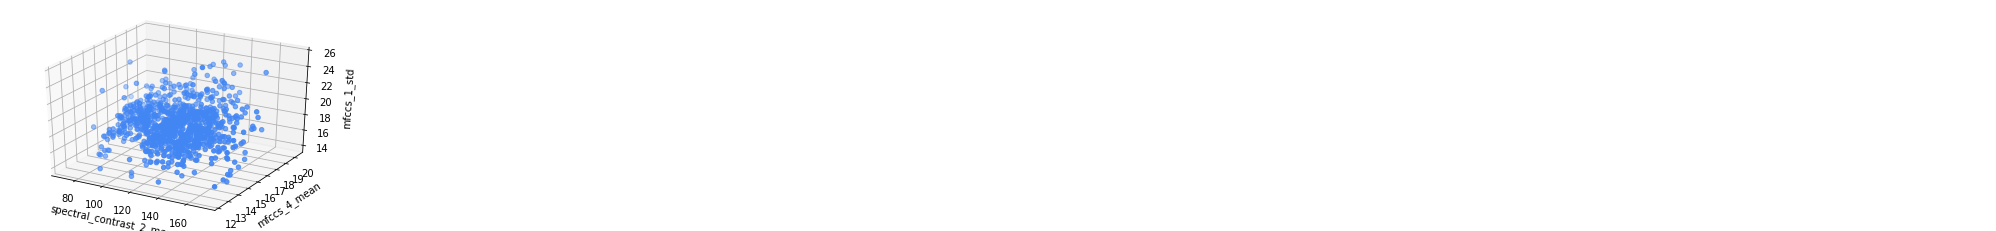

In [2]:
df = pd.read_csv("df_final_features.csv")

print(df.shape)

# Ein Numpy Array aus einem üblichen erstellen
df_np = np.array(df)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cax = ax.scatter(df_np[:,1], df_np[:,2], df_np[:,3], c="#4286f4")

ax.set_xlabel("spectral_contrast_2_mean")
ax.set_ylabel("mfccs_4_mean")
ax.set_zlabel("mfccs_1_std")

plt.savefig("3d_scatter_final.png", dpi=200)
plt.show()

In [3]:
# Liednamen aus dem Array entfernen
feature_array = np.delete(df_np, 0, 1)

# Die Features umskalieren, um Werte zwischen 0 und 1 zu bekommen [0,1]
X_norm = (feature_array - feature_array.min())/(feature_array.max() - feature_array.min())
print(feature_array.min())
print(feature_array.max())

-27.943
172.266


(943, 7)
coordinate:  [0.7262260937320499 0.2092813010404128 0.2277919574045123
 0.2239010234305151 0.20418163019644472 0.35518882767507953
 0.2574359794015254] label:  0 song:  $ea - Flex (Official Video) Shot by IIISLANDBOY.mp3
coordinate:  [0.818854297259364 0.21671852913705178 0.23391555824163748
 0.22876094481267073 0.145792646684215 0.29585583065696347
 0.22298697860735534] label:  5 song:  16 Bit - In The Death Car Vocal Mix.mp3
coordinate:  [0.898770784530166 0.21513018895254457 0.23101858557807092
 0.23513927945297164 0.17778921027526234 0.3746834557887008
 0.23668766139384342] label:  1 song:  2 Chainz - 4 AM ft. Travis Scott.mp3
coordinate:  [0.8565948583730003 0.21390646774121044 0.23393054258300078
 0.22866104920358227 0.14655185331328763 0.36045832105449804
 0.2146506900289198] label:  1 song:  2 Chainz - Bigger Than You ft. Drake, Quavo.mp3
coordinate:  [1.0 0.22623358590273163 0.23157800098896655 0.23150307928215016
 0.12193757523388059 0.38514752084072146 0.24602790084

coordinate:  [0.7262260937320499 0.22188812690738177 0.23251701971439848
 0.23068893006807886 0.14522823649286495 0.37377940052644987
 0.20744821661363874] label:  0 song:  Arcando & VMK - These Walls ft. Tim Riehm  [Lyric Video].mp3
coordinate:  [0.6359704109205879 0.21665359699114428 0.23461982228571143
 0.236318047640216 0.14160702066340675 0.34375577521490047
 0.22596886253864712] label:  2 song:  Ariana Grande - breathin.mp3
coordinate:  [0.818854297259364 0.21712810113431466 0.23277674829802855
 0.23471472311434552 0.11391096304361942 0.27876369194192074
 0.2123431014589754] label:  4 song:  Ariana Grande - Dangerous Woman.mp3
coordinate:  [0.8565948583730003 0.21799219815293017 0.23025438416854388
 0.23399047994845387 0.1636889450524202 0.3362985679964437
 0.22546438971275018] label:  1 song:  Ariana Grande - God is a woman.mp3
coordinate:  [0.6773371826441369 0.21073478215265048 0.22897572037221106
 0.22968997397719385 0.18133050961744976 0.31812755670324516
 0.2124779605312448

coordinate:  [0.818854297259364 0.21030523103356993 0.2219530590532893
 0.2221928085151017 0.1691482400891069 0.2842829243440605
 0.194856375088033] label:  5 song:  britney spears - hold it against me ( jacob plant remix ).mp3
coordinate:  [0.8565948583730003 0.20835227187588967 0.22357636270097747
 0.2243355693300501 0.15322488000039958 0.348955341667957
 0.21030023625311547] label:  1 song:  Britney Spears - Toxic (Official Video).mp3
coordinate:  [0.7262260937320499 0.21549480792571762 0.23067894050717
 0.22786188433087426 0.20361222522464026 0.2731545534916013
 0.18785369289092899] label:  6 song:  Brookes Brothers - Every Minute.mp3
coordinate:  [0.6773371826441369 0.21049503269083808 0.22804169642723357
 0.22874596047130746 0.14157205720022578 0.30014634706731463
 0.2016692556278689] label:  6 song:  Bruno Mars - 24K Magic [Official Video].mp3
coordinate:  [0.700717749951301 0.21657368050387343 0.23540400281705617
 0.2365228336388474 0.17154573470723095 0.3389408068568346
 0.206

coordinate:  [0.8565948583730003 0.21571957304616676 0.22918050637084247
 0.22565918615047276 0.16297968622789186 0.23788640870290548
 0.17728973222981986] label:  5 song:  David Bowie - Suffragette city.mp3
coordinate:  [0.9462211988472047 0.2119734877053479 0.22953014100265223
 0.23056406055671824 0.14250108636474884 0.34125339020723344
 0.210165377180846] label:  3 song:  David Guetta & Afrojack ft Charli XCX & French Montana - Dirty Sexy Money (Official Video).mp3
coordinate:  [0.7848897901692731 0.22145857578830122 0.23818110074971655
 0.2356087888156876 0.17105125144224287 0.3346752643487555
 0.2163638997247876] label:  9 song:  David Guetta feat Anne-Marie - Don't Leave Me Alone (Official Video).mp3
coordinate:  [0.8565948583730003 0.21593434860570704 0.23062399792217134
 0.23003960860900358 0.1812306140083613 0.30707910233805674
 0.24720167425040834] label:  1 song:  David Guetta feat Nicki Minaj & Lil Wayne - Light My Body Up (Lyric Video).mp3
coordinate:  [0.8565948583730003 

coordinate:  [0.7541619008136498 0.22341153494598145 0.24045372585648
 0.23920503074287372 0.1583345404052765 0.3660924334070896
 0.21741779840067127] label:  0 song:  Eminem - Walk On Water (Official Video).mp3
coordinate:  [1.0 0.21472061695528175 0.2169432942575009 0.22066940047650208
 0.1583195560639132 0.37509302778596365 0.21124424975900183] label:  3 song:  Emperor - Bloodsport (ft. Mantmast).mp3
coordinate:  [0.8565948583730003 0.22167834612829596 0.23565873662023185
 0.238585677966525 0.12760665104965313 0.34726211109390687
 0.21196349814443907] label:  4 song:  Era Istrefi - Redrum feat. Felix Snow (Official Video).mp3
coordinate:  [0.7262260937320499 0.2140563111548432 0.23364584009709854
 0.23367081399937065 0.12315630166476033 0.298822730246892
 0.1838778476492066] label:  8 song:  Eric Clapton Layla Original.mp3
coordinate:  [0.818854297259364 0.20915143674859774 0.22289207777872122
 0.2248899899604913 0.14280077319201434 0.30831281311029973
 0.21824693195610587] label:  

coordinate:  [0.898770784530166 0.21978532433606882 0.23562876793750528
 0.2319675938644117 0.1484398803250603 0.3212442997068064
 0.2237911382605178] label:  1 song:  Gucci Mane - Peepin Out The Blinds [Official Audio].mp3
coordinate:  [0.7541619008136498 0.21009545025448406 0.22715762028680028
 0.2261986224395507 0.18750905303957363 0.23848078757698207
 0.18257920473105604] label:  6 song:  guess who- american woman.mp3
coordinate:  [0.5846190730686432 0.2136617234989436 0.2338955791198198
 0.22980984870810006 0.14106758437432884 0.29126562741934675
 0.21052999615401907] label:  2 song:  Gym Class Heroes - Stereo Hearts ft. Adam Levine [OFFICIAL VIDEO].mp3
coordinate:  [0.6558246632269278 0.22058948398923126 0.23645790149293988
 0.2337007826820972 0.18309866189831625 0.307024159753058
 0.21722300196294872] label:  2 song:  Hailee Steinfeld, Alesso - Let Me Go ft. Florida Georgia Line, WATT.mp3
coordinate:  [0.6359704109205879 0.22611870595227987 0.2403588250278459
 0.2365977553456637

coordinate:  [1.0 0.20906153070041808 0.2265033040472706 0.22644836146227193
 0.22072434306150074 0.32409631934628313 0.20357226698100486] label:  3 song:  Juicy J - Ain't Nothing (Video) ft. Wiz Khalifa, Ty Dolla $ign.mp3
coordinate:  [0.8565948583730003 0.22050956750196044 0.23451992667662294
 0.22620361722000507 0.22292204646144778 0.3211843623413533
 0.2204196614537808] label:  1 song:  Juicy J - Gimme Gimme (Video) ft. Slim Jxmmi.mp3
coordinate:  [0.617584624067849 0.21848668141791827 0.23472471267525435
 0.2317877817680524 0.20073523168289137 0.3037725576772273
 0.22445044928050187] label:  2 song:  Justin Bieber - Company.mp3
coordinate:  [0.6359704109205879 0.2253694888841161 0.23619817290930978
 0.23368579834073394 0.15331478604857923 0.4235873512179772
 0.2155047974866265] label:  7 song:  Justin Bieber - Love Yourself  (PURPOSE  - The Movement).mp3
coordinate:  [0.617584624067849 0.2111893071740032 0.2318876773771409
 0.2297199426599204 0.1506875315295516 0.28510206833858615

coordinate:  [0.7262260937320499 0.21632893626160662 0.24149763497145482
 0.23974446703195157 0.16605647098781773 0.39378349624642245
 0.24559335494408344] label:  0 song:  Lil Pump - 'Gucci Gang' (Official Music Video).mp3
coordinate:  [0.818854297259364 0.21399137900893567 0.24272135618278898
 0.23875050572152098 0.07503658676682867 0.26176645405551197
 0.21977033999470552] label:  4 song:  Lil Uzi Vert - Do What I Want [Official Music Video].mp3
coordinate:  [0.9462211988472047 0.22116887852194456 0.237751549630636
 0.2324221188857644 0.16959777033000514 0.3748283044218792
 0.2187364204406395] label:  3 song:  Lil Uzi Vert - The Way Life Goes Remix (Feat. Nicki Minaj) [Official Audio].mp3
coordinate:  [0.9462211988472047 0.2199201834083383 0.235518882767508
 0.23087373694489258 0.1692681148200131 0.38322453036576776
 0.2165986544061456] label:  3 song:  Lil Uzi Vert - The Way Life Goes Remix (Feat. Nicki Minaj) [Official Music Video].mp3
coordinate:  [0.898770784530166 0.21162385307

coordinate:  [0.700717749951301 0.22944023495447258 0.22893576212857564
 0.22347147231143455 0.09137451363325327 0.3535405501251192
 0.20964092523313138] label:  8 song:  Mefjus - The Sirens.mp3
coordinate:  [0.818854297259364 0.20906652548087248 0.22778196784360344
 0.22968997397719385 0.11723249204581214 0.3229025668176755
 0.19798810243295756] label:  4 song:  Meghan Trainor - All About That Bass (Official Music Video).mp3
coordinate:  [0.6773371826441369 0.2275172444795189 0.2438301974436714
 0.24062354839193043 0.17184542153449645 0.31742828743962564
 0.20688880120274314] label:  6 song:  Meghan Trainor - Like I'm Gonna Lose You (Official Music Video) ft. John Legend.mp3
coordinate:  [0.7541619008136498 0.21551978182798975 0.23357591317073656
 0.23348101234210253 0.15177639366861628 0.33274727909334745
 0.2220279807601057] label:  8 song:  Meghan Trainor - Me Too (Official Music Video).mp3
coordinate:  [0.7848897901692731 0.2292004854926602 0.24134279677736767
 0.24147765584963715

coordinate:  [0.5846190730686432 0.2103951370817496 0.22986479129309872
 0.22942525061310928 0.22351143055506992 0.40234954472576157
 0.19070571253040572] label:  7 song:  plummet - damaged ( blinding lights remix ).mp3
coordinate:  [0.5846190730686432 0.21604922855615882 0.23427518243435608
 0.23165292269578291 0.22862608574040125 0.41339799909095
 0.1934028939757953] label:  7 song:  Plummet - Damaged (Blinding Lights Remix).mp3
coordinate:  [0.7262260937320499 0.2169233151356832 0.23134324630760858
 0.22127876369194194 0.19185950681537794 0.385212452986629
 0.2266781213631755] label:  0 song:  Pola & Bryson - Dream Days.mp3
coordinate:  [0.5697845751190006 0.21460074222437553 0.22886084042175925
 0.23203752079077367 0.16274992632698831 0.3573815362945722
 0.18983162595088132] label:  7 song:  Pola & Bryson - Night Dawns (ft. Lauren Archer).mp3
coordinate:  [0.5697845751190006 0.21444590403028832 0.22527458805548203
 0.2245353605482271 0.1628897801797122 0.3277674829802856
 0.2040567

coordinate:  [0.700717749951301 0.2125279083357891 0.22633348151182014
 0.2205495257455959 0.1820897162465224 0.36211658816536724
 0.20148944353150958] label:  0 song:  Shawn Mendes - Treat You Better.mp3
coordinate:  [0.6773371826441369 0.21492040817345873 0.22744232277270252
 0.2268978917031702 0.17242981084766418 0.34326129194991234
 0.20230359274558088] label:  0 song:  Shawn Mendes, Zedd - Lost In Japan (Remix).mp3
coordinate:  [0.898770784530166 0.21552977138889862 0.23445998931116985
 0.22999465558491375 0.1680593779500422 0.32108946151271917
 0.20362221478554912] label:  1 song:  Shelter Boy - Half Asleep (Official Musicvideo).mp3
coordinate:  [0.7262260937320499 0.21063488654356197 0.22940027671083715
 0.22986479129309872 0.14224635256157317 0.316669080810553
 0.2127676577976015] label:  8 song:  Shy FX - Badboy Business (ft. Kate Stewart & Mr. Williamz).mp3
coordinate:  [0.7262260937320499 0.21648377445569378 0.23401045907027157
 0.23337112717210515 0.14052315330479648 0.3091

 0.21370667652303343] label:  2 song:  The Chainsmokers - This Feeling (Official Video) ft. Kelsea Ballerini.mp3
coordinate:  [0.700717749951301 0.21543986534071896 0.23179777132896123
 0.22772203047815032 0.02019889215769521 0.25682661618608554
 0.1851565114455394] label:  8 song:  The Guess Who - Share The Land-rLQJ4toj-JY.mp3
coordinate:  [0.700717749951301 0.21567462002207693 0.2320824738148635
 0.22801672252496138 0.020059038304971313 0.25714628213516877
 0.18506660539735975] label:  8 song:  The Guess Who - Share The Land.mp3
coordinate:  [0.7262260937320499 0.2156596356807137 0.23064897182444344
 0.22899569949402873 0.21810208332292752 0.2699429096594059
 0.1860655614882448] label:  6 song:  The Jimi Hendrix Experience - All Along The Watchtower (Official Audio).mp3
coordinate:  [0.7541619008136498 0.21872643087973065 0.2347097283338911
 0.23154803230624 0.1640835327083198 0.32111943019544575
 0.21319720891668206] label:  8 song:  The Kemist - Body Can't Lie ft. Nyanda.mp3
coord

coordinate:  [0.7262260937320499 0.2145158309566503 0.2323721710812201
 0.23290661258984363 0.19830776838204078 0.30771343945576873
 0.20240348835466937] label:  6 song:  ZAYN, Taylor Swift - I Don’t Wanna Live Forever (Fifty Shades Darker).mp3
coordinate:  [0.6558246632269278 0.21759761049703058 0.2330964142471118
 0.23283169088302724 0.18071115684110103 0.3353195910273764
 0.2135768122312184] label:  2 song:  Zedd, Alessia Cara - Stay (Official Music Video).mp3
coordinate:  [0.6773371826441369 0.21448086749346934 0.2344300206284433
 0.23956964971604672 0.12677751749421853 0.3029833823654281
 0.21126422888081955] label:  2 song:  Zedd, Maren Morris, Grey - The Middle (Official Music Video).mp3
coordinate:  [1.0 0.2221078972473765 0.23542398193887387 0.23336613239165072
 0.18616545709733331 0.36135238675584014 0.19941161486246872] label:  3 song:  Zeds Dead & Jauz - Lights Go Down.mp3
coordinate:  [0.8565948583730003 0.2073583105654591 0.2192458880469909
 0.22124879500921538 0.15682611

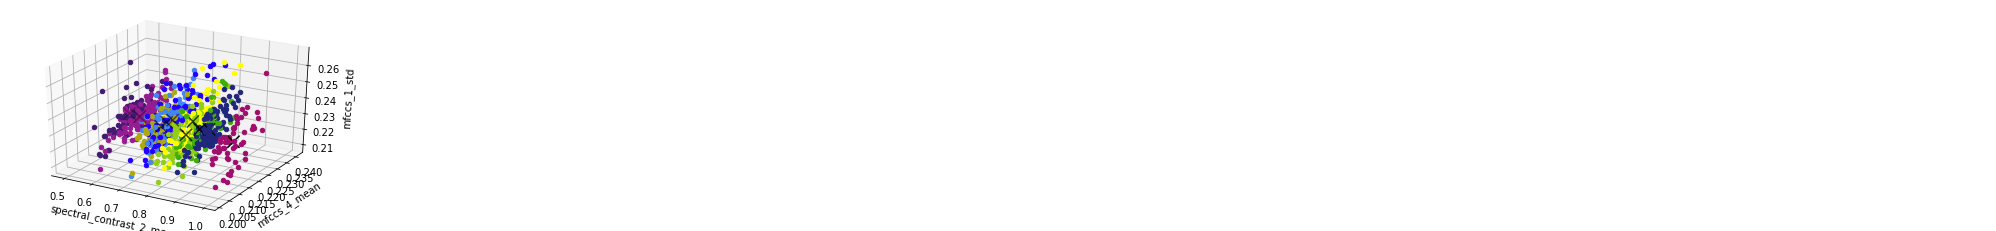

In [4]:
# 
print(X_norm.shape)
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X_norm)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ["#4286f4", "#20267c", "#961c92", "#a00e6d", "#3faf07", "#91ce16", "#adaa0d","#421a72", "#2200ff", "#ffff00"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("spectral_contrast_2_mean")
ax.set_ylabel("mfccs_4_mean")
ax.set_zlabel("mfccs_1_std")

for i in range(len(X_norm)):
    print("coordinate: ", X_norm[i], "label: ", labels[i], "song: ", df_np[i][0])
    ax.scatter(X_norm[i,0], X_norm[i,1], X_norm[i,2], c=colors[labels[i]])

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], color = "black", marker = "x", s=150, linewidths = 5, zorder = 10)
plt.savefig("Kmeans_scatter_final.png", dpi=200)
plt.show()

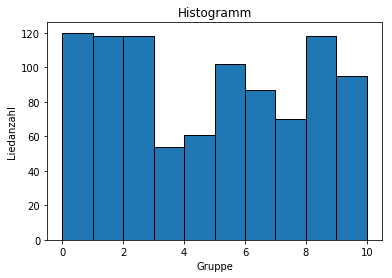

In [5]:
# Wie viele Lieder gehören zu jeder Gruppe
a = np.array(labels) 
plt.hist(a, bins = [0,1,2,3,4,5,6,7,8,9,10], edgecolor='black', linewidth=1) 
plt.title("Histogramm") 
plt.xlabel("Gruppe")
plt.ylabel("Liedanzahl")
plt.savefig("histogram__final.png",dpi=200)
plt.show()

In [9]:
#Das trainierte Modell speichern
pkl_filename = "kmeans_final_model.pkl"
with open(pkl_filename, 'wb') as file:  
    pickle.dump(kmeans, file)

In [10]:
#Das gespeicherte Modell laden
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

In [11]:
# Das Modell testen
print(pickle_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
